# Лабораторная работа 2
## Вариант 8
### Барсегян Люба, ИУ6-55Б

### Подключение библиотек


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
!pip install odfpy

### Задание 1.
#### Разделение данных на обучающую (85%) и тестовую часть (15%) случайным образом (можно сделать более корректным методом – разделить в такой пропорции с сохранением распределения таргета в каждой подвыборке).


In [2]:
# для инициализации рандомных чисел
RANDOM_SEED = 46

In [3]:
df = pd.read_excel('data.xlsx')

X = df.iloc[:, 2:10]
Y = df['Ybin']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85,
                                                          random_state = RANDOM_SEED,
                                                          stratify = Y)

print('Количество 0 и 1 в Y_train и Y_test:\n')
print(pd.DataFrame([np.bincount(Y_train), np.bincount(Y_test)],
                   columns=['Class 0', 'Class 1'],
                   index=['Y_train', 'Y_test']))

Количество 0 и 1 в Y_train и Y_test:

         Class 0  Class 1
Y_train       27       12
Y_test         6        2


### Задание 2.
#### Нормирование (масштабирование) исходных данных. Обратите внимание, что данные для нормализации (масштабирования) рассчитываются только на основе обучающей выборки.


In [4]:
X_mean = X_train.mean()
X_std = X_train.std()

#нормализация тренировочных и тестовых данных
for col in X_train.columns:
    X_train[col] = (X_train[col] - X_mean[col]) / X_std[col]
    X_test[col] = (X_test[col] - X_mean[col]) / X_std[col]

### Задание 3.
#### С помощью библиотеки sklearn сделать fit-predict модели kNN. Перебрать по сетке параметр числа соседей с целью определения наилучшего на тестовой выборке.


In [5]:
# модель
knn = KNeighborsClassifier()
# определение сетки параметров для перебора
grid_params = { 'n_neighbors': list(range(1, 21)) }
# создание объекта GridSearchCV
grid = GridSearchCV(knn, grid_params, cv = 5,
                    scoring = 'accuracy', verbose = 2)

# обучение модели с перебором параметров
knn_model = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................

In [6]:
# Вывод наилучших параметров и оценки
print("Наилучший параметр (число соседей):", knn_model.best_params_)
print("Лучшая оценка (точность (без тестовых данных)):\
 {:.2f}%".format(knn_model.best_score_ * 100))

# Тестирование модели с наилучшими параметрами
best_knn = knn_model.best_estimator_
Y_predicted = best_knn.predict(X_test)

print(classification_report(Y_test, Y_predicted))

Наилучший параметр (число соседей): {'n_neighbors': 7}
Лучшая оценка (точность (без тестовых данных)): 77.50%
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.50      0.50      0.50         2

    accuracy                           0.75         8
   macro avg       0.67      0.67      0.67         8
weighted avg       0.75      0.75      0.75         8



### Задание 4.
#### С помощью библиотеки sklearn сделать fit-predict модели логистической регрессии. Перебрать по сетке параметр регуляризации с целью определения наилучшего на тестовой выборке.


In [7]:
# метод
logistic_regression = LogisticRegression()
# параметры лог. регрессии
grid_params={'penalty': ['l2', 'l1'], 'solver': ['liblinear']}
# создание объекта GridSearchCV
grid = GridSearchCV(logistic_regression, grid_params, cv = 5,
                    scoring = 'accuracy', verbose = 2)

# обучение модели с перебором параметров
logistic_model = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .......................penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......................penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......................penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......................penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......................penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......................penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......................penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......................penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......................penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......................penalty=l1, solver=liblinear; total time=   0.0s


In [8]:
# Вывод наилучших параметров и оценки
print("Наилучший параметр:", logistic_model.best_params_)
print("Лучшая оценка (точность (без тестовых данных)):\
 {:.2f}%".format(logistic_model.best_score_ * 100))

# Тестирование модели с наилучшими параметрами
best_logistic = logistic_model.best_estimator_
Y_predicted = logistic_model.predict(X_test)

print(classification_report(Y_test, Y_predicted))

Наилучший параметр: {'penalty': 'l2', 'solver': 'liblinear'}
Лучшая оценка (точность (без тестовых данных)): 72.14%
              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.20      0.50      0.29         2

    accuracy                           0.38         8
   macro avg       0.43      0.42      0.37         8
weighted avg       0.55      0.38      0.40         8



#### попытка улучшить модель логистической регрессии

In [9]:
RANDOM_SEED2 = 51

df2 = pd.read_excel('data.xlsx')

X2 = df2.iloc[:, 2:10]
Y2 = df2['Ybin']

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, train_size = 0.85,
                                                          random_state = RANDOM_SEED2,
                                                          stratify = Y2)
X2_mean = X2_train.mean()
X2_std = X2_train.std()

#нормализация тренировочных и тестовых данных
for col in X2_train.columns:
    X2_train[col] = (X2_train[col] - X2_mean[col]) / X2_std[col]
    X2_test[col] = (X2_test[col] - X2_mean[col]) / X2_std[col]

# метод
logistic_regression = LogisticRegression()
# параметры лог. регрессии
grid_params={'penalty': ['l2', 'l1'], 'solver': ['liblinear']}
# создание объекта GridSearchCV
grid = GridSearchCV(logistic_regression, grid_params, cv = 5,
                    scoring = 'accuracy', verbose = 0)

# обучение модели с перебором параметров
logistic_model2 = grid.fit(X2_train, Y2_train)

# Вывод наилучших параметров и оценки
print("Наилучший параметр:", logistic_model2.best_params_)
print("Лучшая оценка (точность (без тестовых данных)):\
 {:.2f}%".format(logistic_model2.best_score_ * 100))

# Тестирование модели с наилучшими параметрами
best_logistic = logistic_model2.best_estimator_
Y2_predicted = logistic_model2.predict(X2_test)

print(classification_report(Y2_test, Y2_predicted))

Наилучший параметр: {'penalty': 'l1', 'solver': 'liblinear'}
Лучшая оценка (точность (без тестовых данных)): 72.14%
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8



### Задание 5.
#### С помощью библиотеки sklearn сделать fit-predict модели дерева решений. Перебрать по сетке параметр глубины дерева с целью определения наилучшего на тестовой выборке.

#### Дополнительно (желательно, но не обязательно): с помощьюбиблиотеки sklearn сделать fit-predict модели случайного леса.
Перебрать по сетке параметр глубины дерева с целью определения
наилучшего на тестовой выборке.


In [10]:
# метод
decision_tree = DecisionTreeClassifier(splitter = 'best')
# параметры
grid_params={'max_depth': range (1, 100)}
# создание объекта GridSearchCV
grid = GridSearchCV(decision_tree, grid_params, cv = 5,
                    scoring = 'accuracy', verbose = 2)

# обучение модели с перебором параметров
decision_tree_model = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ......................................

In [11]:
# Вывод наилучших параметров и оценки
print("Наилучший параметр:", decision_tree_model.best_params_)
print("Лучшая оценка (точность (без тестовых данных)):\
 {:.2f}%".format(decision_tree_model.best_score_ * 100))

# Тестирование модели с наилучшими параметрами
best_desicion_tree = decision_tree_model.best_estimator_
Y_predicted = best_desicion_tree.predict(X_test)

print(classification_report(Y_test, Y_predicted))

Наилучший параметр: {'max_depth': 3}
Лучшая оценка (точность (без тестовых данных)): 69.64%
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.50      0.50      0.50         2

    accuracy                           0.75         8
   macro avg       0.67      0.67      0.67         8
weighted avg       0.75      0.75      0.75         8



##### случайный лес

In [12]:
# метод
random_forest = RandomForestClassifier()
# параметры
grid_params={'max_depth': range (1, 21)}
# создание объекта GridSearchCV
grid = GridSearchCV(random_forest, grid_params, cv = 5,
                    scoring = 'accuracy', verbose = 2)

# обучение модели с перебором параметров
random_forest_model = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=3; total time=   0.3s
[CV] END ......................................

In [13]:
# Вывод наилучших параметров и оценки
print("Наилучший параметр:", random_forest_model.best_params_)
print("Лучшая оценка (точность (без тестовых данных)):\
 {:.2f}%".format(random_forest_model.best_score_ * 100))

# Тестирование модели с наилучшими параметрами
best_forest = random_forest_model.best_estimator_
Y_predicted = best_forest.predict(X_test)

print(classification_report(Y_test, Y_predicted))

Наилучший параметр: {'max_depth': 11}
Лучшая оценка (точность (без тестовых данных)): 74.64%
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.25      0.50      0.33         2

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.62      0.50      0.53         8



### Задания 6-7.
#### Сравнить качество всех моделей на обучающей и тестовой выборке отдельно по метрикам Accuracy, ROC-AUC, Precision, Recall, F1-мера. Обратите внимание, что 4 из 5 метрик требуют определения порога отсечения по вероятности. В качестве эвристики предлагается взять его как среднее значение полученных вероятностей (желательно, но не обязательно:подобрать по сетке такой порог, при котором precision и recall примерно уравниваются). Проанализировать различие в качестве между моделями. Определить на основе метрик модели, в которых сильно выражено переобучение.



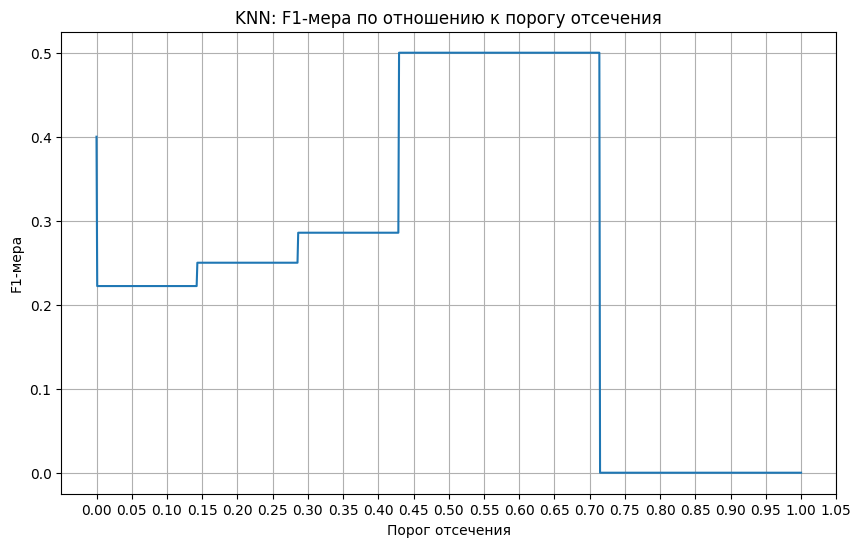

In [14]:
# массив пороговых значений от 0 до 1 с 1000 точками
thresholds = np.linspace(0, 1, 1000)
# список для хранения значений F1-меры
f1_scores = []
# вероятности принадлежности к классу 1 (positive) из модели k-ближайших соседей
y_scores = knn_model.predict_proba(X_test)[:, 1]

# перебираем пороговые значения и вычисляем F1-меру для каждого
for threshold in thresholds:
    y_pred = [1 if score >= threshold else 0 for score in y_scores]
    f1 = f1_score(Y_test, y_pred)
    f1_scores.append(f1)


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores)
plt.xlabel('Порог отсечения')
plt.ylabel('F1-мера')
plt.grid(True)
plt.title('KNN: F1-мера по отношению к порогу отсечения')
plt.xticks(np.arange(0, 1.1, 0.05))
plt.show()

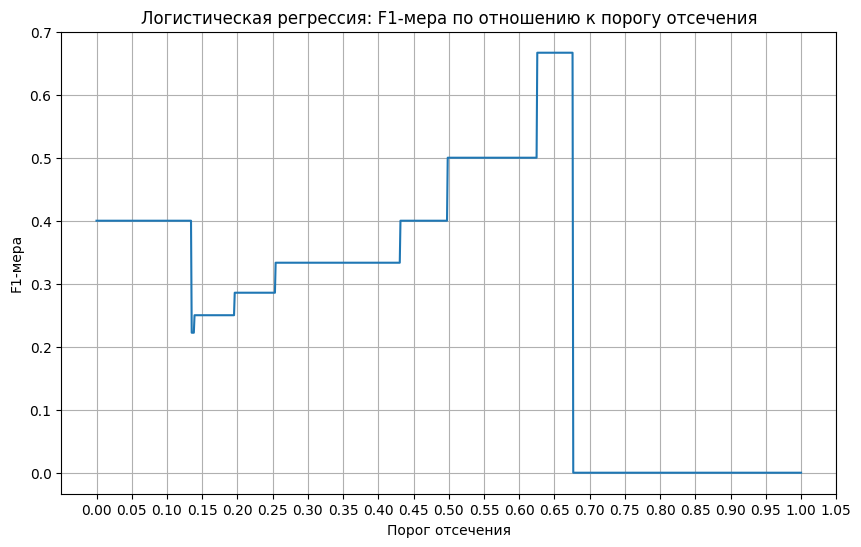

In [15]:
# массив пороговых значений от 0 до 1 с 1000 точками
thresholds = np.linspace(0, 1, 1000)
# список для хранения значений F1-меры
f1_scores = []
# вероятности принадлежности к классу 1 (positive) из модели k-ближайших соседей
y_scores = logistic_model2.predict_proba(X_test)[:, 1]

# перебираем пороговые значения и вычисляем F1-меру для каждого
for threshold in thresholds:
    y_pred = [1 if score >= threshold else 0 for score in y_scores]
    f1 = f1_score(Y_test, y_pred)
    f1_scores.append(f1)


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores)
plt.xlabel('Порог отсечения')
plt.ylabel('F1-мера')
plt.grid(True)
plt.title('Логистическая регрессия: F1-мера по отношению к порогу отсечения')
plt.xticks(np.arange(0, 1.1, 0.05))
plt.show()

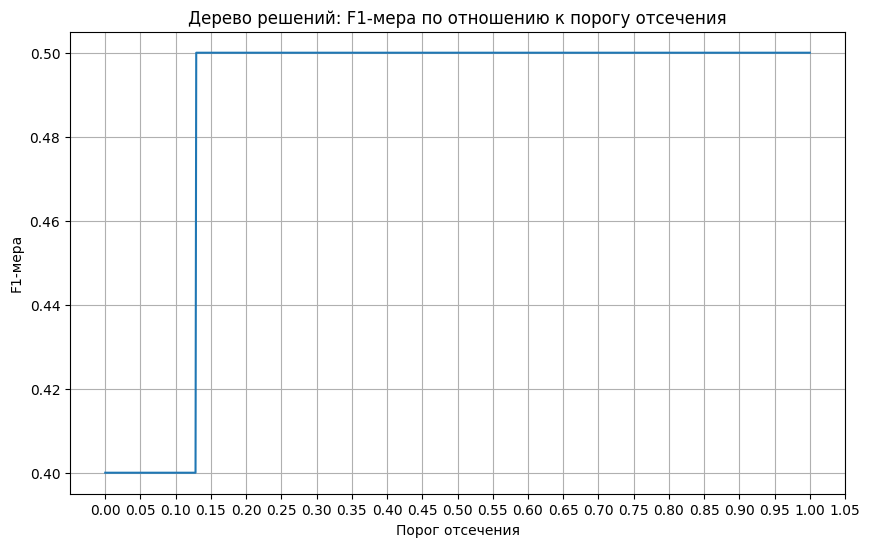

In [16]:
# массив пороговых значений от 0 до 1 с 1000 точками
thresholds = np.linspace(0, 1, 1000)
# список для хранения значений F1-меры
f1_scores = []
# вероятности принадлежности к классу 1 (positive) из модели k-ближайших соседей
y_scores = decision_tree_model.predict_proba(X_test)[:, 1]

# перебираем пороговые значения и вычисляем F1-меру для каждого
for threshold in thresholds:
    y_pred = [1 if score >= threshold else 0 for score in y_scores]
    f1 = f1_score(Y_test, y_pred)
    f1_scores.append(f1)


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores)
plt.xlabel('Порог отсечения')
plt.ylabel('F1-мера')
plt.grid(True)
plt.title('Дерево решений: F1-мера по отношению к порогу отсечения')
plt.xticks(np.arange(0, 1.1, 0.05))
plt.show()

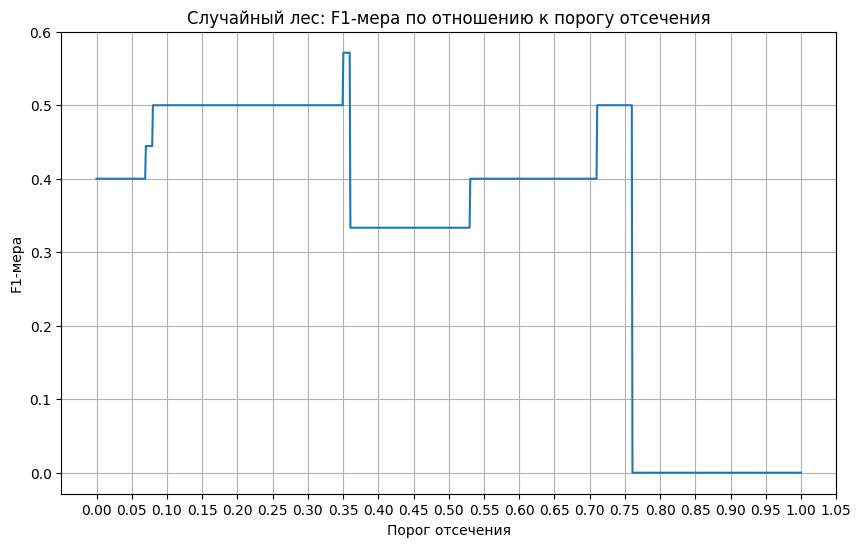

In [17]:
# массив пороговых значений от 0 до 1 с 1000 точками
thresholds = np.linspace(0, 1, 1000)
# список для хранения значений F1-меры
f1_scores = []
# вероятности принадлежности к классу 1 (positive) из модели k-ближайших соседей
y_scores = random_forest_model.predict_proba(X_test)[:, 1]

# перебираем пороговые значения и вычисляем F1-меру для каждого
for threshold in thresholds:
    y_pred = [1 if score >= threshold else 0 for score in y_scores]
    f1 = f1_score(Y_test, y_pred)
    f1_scores.append(f1)


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores)
plt.xlabel('Порог отсечения')
plt.ylabel('F1-мера')
plt.grid(True)
plt.title('Случайный лес: F1-мера по отношению к порогу отсечения')
plt.xticks(np.arange(0, 1.1, 0.05))
plt.show()

полученные пороги отсечения

In [18]:
knn_threshold = 0.55
logistic_regression_threshold = 0.65
decision_tree_threshold = 0.3
random_forest_threshold = 0.7

In [19]:
print('НА ОСНОВЕ ТРЕНИРОВОЧНЫХ ДАННЫХ')
y_scores = knn_model.predict_proba(X_test)[:,1]
y_pred = [1 if score >= knn_threshold else 0 for score in y_scores]

print('Accuracy: ', accuracy_score(Y_test, y_pred))
print('Precision: ', precision_score(Y_test, y_pred))
print('Recall: ', recall_score(Y_test, y_pred))
print('F1: ', f1_score(Y_test, y_pred))
print('ROC-AUC', roc_auc_score(Y_test, y_pred))

print('\n')
print('НА ОСНОВЕ ТЕСТОВЫХ ДАННЫХ')
y_scores = knn_model.predict_proba(X_train)[:,1]
y_pred = [1 if score >= knn_threshold else 0 for score in y_scores]

print('Accuracy: ', accuracy_score(Y_train, y_pred))
print('Precision: ', precision_score(Y_train, y_pred))
print('Recall: ', recall_score(Y_train, y_pred))
print('F1: ', f1_score(Y_train, y_pred))
print('ROC-AUC', roc_auc_score(Y_train, y_pred))

НА ОСНОВЕ ТРЕНИРОВОЧНЫХ ДАННЫХ
Accuracy:  0.75
Precision:  0.5
Recall:  0.5
F1:  0.5
ROC-AUC 0.6666666666666666


НА ОСНОВЕ ТЕСТОВЫХ ДАННЫХ
Accuracy:  0.7692307692307693
Precision:  1.0
Recall:  0.25
F1:  0.4
ROC-AUC 0.625


In [20]:
print('НА ОСНОВЕ ТРЕНИРОВОЧНЫХ ДАННЫХ')
y_scores = logistic_model.predict_proba(X_test)[:,1]
y_pred = [1 if score >= logistic_regression_threshold else 0 for score in y_scores]

print('Accuracy: ', accuracy_score(Y_test, y_pred))
print('Precision: ', precision_score(Y_test, y_pred))
print('Recall: ', recall_score(Y_test, y_pred))
print('F1: ', f1_score(Y_test, y_pred))
print('ROC-AUC', roc_auc_score(Y_test, y_pred))

print('\n')
print('НА ОСНОВЕ ТЕСТОВЫХ ДАННЫХ')
y_scores = logistic_model.predict_proba(X_train)[:,1]
y_pred = [1 if score >= logistic_regression_threshold else 0 for score in y_scores]

print('Accuracy: ', accuracy_score(Y_train, y_pred))
print('Precision: ', precision_score(Y_train, y_pred))
print('Recall: ', recall_score(Y_train, y_pred))
print('F1: ', f1_score(Y_train, y_pred))
print('ROC-AUC', roc_auc_score(Y_train, y_pred))

НА ОСНОВЕ ТРЕНИРОВОЧНЫХ ДАННЫХ
Accuracy:  0.5
Precision:  0.25
Recall:  0.5
F1:  0.3333333333333333
ROC-AUC 0.5


НА ОСНОВЕ ТЕСТОВЫХ ДАННЫХ
Accuracy:  0.8461538461538461
Precision:  1.0
Recall:  0.5
F1:  0.6666666666666666
ROC-AUC 0.75


In [21]:
print('НА ОСНОВЕ ТРЕНИРОВОЧНЫХ ДАННЫХ')
y_scores = decision_tree_model.predict_proba(X_test)[:,1]
y_pred = [1 if score >= decision_tree_threshold else 0 for score in y_scores]

print('Accuracy: ', accuracy_score(Y_test, y_pred))
print('Precision: ', precision_score(Y_test, y_pred))
print('Recall: ', recall_score(Y_test, y_pred))
print('F1: ', f1_score(Y_test, y_pred))
print('ROC-AUC', roc_auc_score(Y_test, y_pred))


print('\n')
print('НА ОСНОВЕ ТЕСТОВЫХ ДАННЫХ')
y_scores = decision_tree_model.predict_proba(X_train)[:,1]
y_pred = [1 if score >= decision_tree_threshold else 0 for score in y_scores]

print('Accuracy: ', accuracy_score(Y_train, y_pred))
print('Precision: ', precision_score(Y_train, y_pred))
print('Recall: ', recall_score(Y_train, y_pred))
print('F1: ', f1_score(Y_train, y_pred))
print('ROC-AUC', roc_auc_score(Y_train, y_pred))

НА ОСНОВЕ ТРЕНИРОВОЧНЫХ ДАННЫХ
Accuracy:  0.75
Precision:  0.5
Recall:  0.5
F1:  0.5
ROC-AUC 0.6666666666666666


НА ОСНОВЕ ТЕСТОВЫХ ДАННЫХ
Accuracy:  0.8974358974358975
Precision:  1.0
Recall:  0.6666666666666666
F1:  0.8
ROC-AUC 0.8333333333333333


In [22]:
print('НА ОСНОВЕ ТРЕНИРОВОЧНЫХ ДАННЫХ')
y_scores = random_forest_model.predict_proba(X_test)[:,1]
y_pred = [1 if score >= random_forest_threshold else 0 for score in y_scores]

print('Accuracy: ', accuracy_score(Y_test, y_pred))
print('Precision: ', precision_score(Y_test, y_pred))
print('Recall: ', recall_score(Y_test, y_pred))
print('F1: ', f1_score(Y_test, y_pred))
print('ROC-AUC', roc_auc_score(Y_test, y_pred))


print('\n')
print('НА ОСНОВЕ ТЕСТОВЫХ ДАННЫХ')
y_scores = random_forest_model.predict_proba(X_train)[:,1]
y_pred = [1 if score >= random_forest_threshold else 0 for score in y_scores]

print('Accuracy: ', accuracy_score(Y_train, y_pred))
print('Precision: ', precision_score(Y_train, y_pred))
print('Recall: ', recall_score(Y_train, y_pred))
print('F1: ', f1_score(Y_train, y_pred))
print('ROC-AUC', roc_auc_score(Y_train, y_pred))

НА ОСНОВЕ ТРЕНИРОВОЧНЫХ ДАННЫХ
Accuracy:  0.625
Precision:  0.3333333333333333
Recall:  0.5
F1:  0.4
ROC-AUC 0.5833333333333334


НА ОСНОВЕ ТЕСТОВЫХ ДАННЫХ
Accuracy:  0.9743589743589743
Precision:  1.0
Recall:  0.9166666666666666
F1:  0.9565217391304348
ROC-AUC 0.9583333333333333


### Задание 8.
#### Сравнить полученную важность признаков в модели логистической регрессии, в модели деревьев решений и в случайном лесе (для древесных моделей это можно сделать с помощью ключа feature_importances у обученной модели). Проинтерпретировать полученную важность признаков.


In [23]:
print('Важность признаков в модели логистической регрессии\n')

print(pd.DataFrame(logistic_model.best_estimator_.coef_, columns=['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']))

Важность признаков в модели логистической регрессии

         x2        x3        x4        x5        x6        x7        x8  \
0 -0.612072  0.813513 -0.619968  0.391649 -0.608739 -1.211684 -0.550841   

         x9  
0  0.311528  


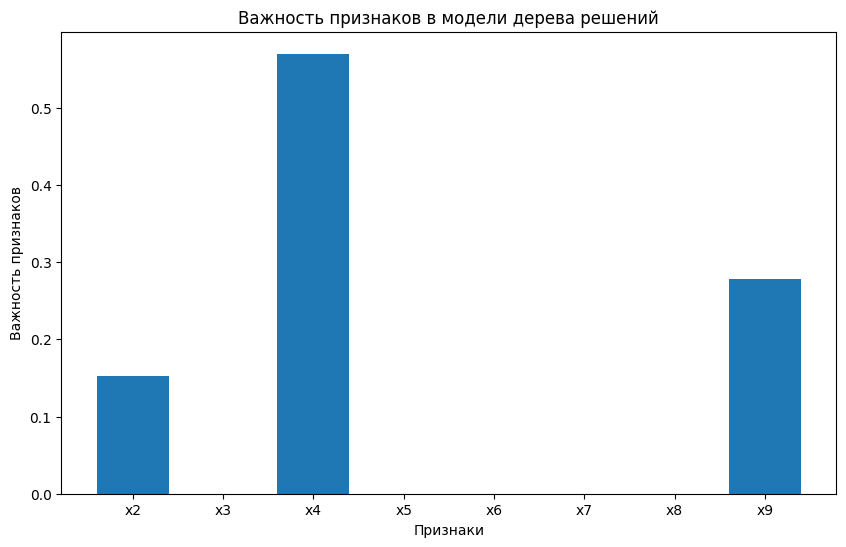

In [24]:
feature_importance = decision_tree_model.best_estimator_.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), labels=X.columns)
plt.xlabel('Признаки')
plt.ylabel('Важность признаков')
plt.title('Важность признаков в модели дерева решений')
plt.show()

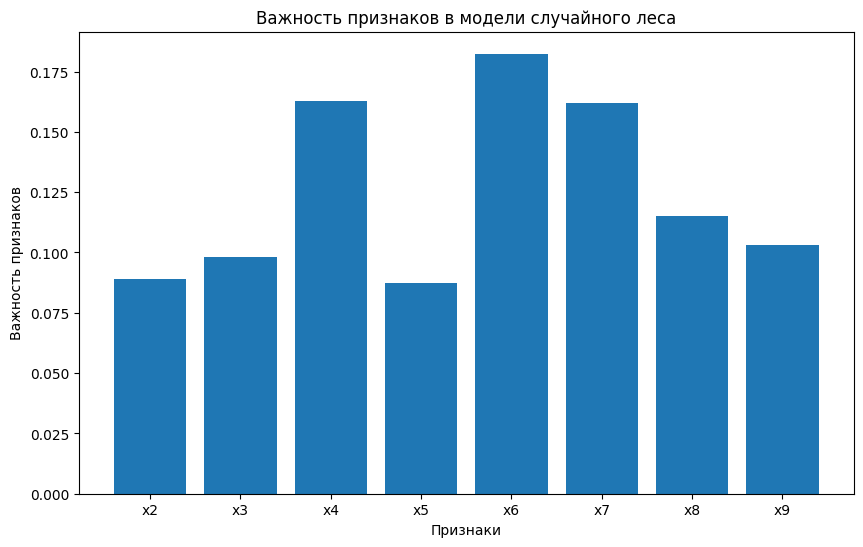

In [25]:
feature_importance = random_forest_model.best_estimator_.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), labels=X.columns)
plt.xlabel('Признаки')
plt.ylabel('Важность признаков')
plt.title('Важность признаков в модели случайного леса')
plt.show()